# `1. Multilayer Perceptron`

In [ ]:
!pip install tensorflow==2.3.0
!pip install keras==2.4

In [8]:
import re
import random
import numpy as np
import pandas as pd
from tensorflow import keras
import tensorflow
import keras
keras.__version__

'2.4.0'

## Data import - Heart Failure

In [9]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [10]:
cols = ['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex', 'smoking','time','DEATH_EVENT']

In [11]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Normalisation

In [12]:
for column in cols[:-1]:
    df[column] = (df[column] - df[column].mean())/df[column].std()

## Data preparation

In [13]:
from sklearn.preprocessing import OneHotEncoder

Y = df.iloc[:, -1].values.reshape(-1, 1)
Y = OneHotEncoder().fit_transform(Y).toarray()
X = df.iloc[:, :-1].values

num_samples = X.shape[0]
train_samples = int(0.75*num_samples)

indexes = np.arange(num_samples)
random.shuffle(indexes)

X, Y = X[indexes], Y[indexes]
X_train, Y_train = X[:train_samples, :], Y[:train_samples]
X_test, Y_test = X[train_samples:, :], Y[train_samples:]

## Model initialising

In [14]:
inputs = keras.Input(shape=(12,))
x = keras.layers.Dense(64, activation="relu")(inputs)

outputs = keras.layers.Dense(2, activation="softmax")(x)

fc_model = keras.Model(inputs=inputs, outputs=outputs, name="fc_model")
fc_model.compile(
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

## Training

In [15]:
import warnings
warnings.simplefilter(action="ignore", category=UserWarning)
test_scores = fc_model.evaluate(X_test, Y_test, verbose=2)

3/3 - 0s - loss: 0.6363 - accuracy: 0.6667


## Eval

In [16]:
test_scores = fc_model.evaluate(X_test, Y_test, verbose=2)

3/3 - 0s - loss: 0.6363 - accuracy: 0.6667


# `2. Convolutional neural network`

In [18]:
!pip install opendatasets --upgrade --quiet

In [ ]:
from google.colab import files
files.upload()

## Data import

In [20]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/puneet6060/intel-image-classification/download'
od.download(dataset_url)

Skipping, found downloaded files in "./intel-image-classification" (use force=True to force download)


In [21]:
import os

DATA_DIR = './intel-image-classification/seg_train/seg_train'
classes=os.listdir(DATA_DIR)
print(classes)
len(classes)

['forest', 'sea', 'glacier', 'mountain', 'buildings', 'street']


6

In [22]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten,Conv2D,Dropout
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

print(tf.version.VERSION)

2.3.0


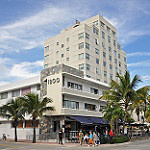

In [23]:
im=Image.open('./intel-image-classification/seg_train/seg_train/buildings/10032.jpg')
im

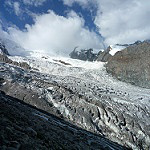

In [24]:
im2=Image.open('./intel-image-classification/seg_train/seg_train/glacier/10003.jpg')
im2

## Model creating

In [25]:
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(3000,activation='relu'))
model.add(Dense(units=6,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30752)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 3000)              92259000  
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 18006     
Total params: 92,277,902
Trainable params: 92,277,902
Non-trainable params: 0
_________________________________________________________________


## Model compiling

In [27]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

## Loading data in the model

In [28]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('./intel-image-classification/seg_train/seg_train', 
                                                    target_size = (64, 64), 
                                                    batch_size = 32)
test_set = test_datagen.flow_from_directory('./intel-image-classification/seg_test/seg_test',
                                                target_size = (64, 64),
                                                 batch_size = 32)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [29]:
len(set(training_set.classes))

6

## Fitting and training model

In [30]:
fitted_model = model.fit_generator(training_set,
                        steps_per_epoch = 100,
                        epochs = 20,
                        validation_data = test_set,
                        validation_steps = 100)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - 107s 1s/step - loss: 3.5229 - accuracy: 0.4984 - val_loss: 1.1707 - val_accuracy: 0.5903
Epoch 2/20
100/100 [==============================] - 90s 903ms/step - loss: 0.9651 - accuracy: 0.6466
Epoch 3/20
100/100 [==============================] - 93s 932ms/step - loss: 0.8805 - accuracy: 0.6656
Epoch 4/20
100/100 [==============================] - 98s 978ms/step - loss: 0.8347 - accuracy: 0.6941
Epoch 5/20
100/100 [==============================] - 97s 966ms/step - loss: 0.8211 - accuracy: 0.6866
Epoch 6/20
100/100 [==============================] - 95s 954ms/step - loss: 0.8059 - accuracy: 0.7006
Epoch 7/20
100/100 [==============================] - 88s 875ms/step - loss: 0.7576 - accuracy: 0.7225
Epoch 8/20
100/100 [==============================] - 87s 871ms/step - loss: 0.6927 - accuracy: 0.7433
Epoch 9/20
100/100 [==============================] - 87s 86

## Plotting results

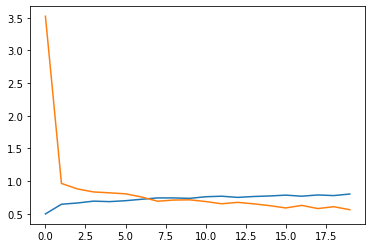

In [31]:
plt.plot([i for i in range(20)],fitted_model.history['accuracy'])
plt.plot([i for i in range(20)],fitted_model.history['loss'])

In [32]:
def image_prediction(path):
    imm=Image.open(path)
    imm=imm.resize((64,64))
    x=np.array(imm)
    x=np.expand_dims(x,axis=0)
    classs=model.predict_classes(x)
    l=os.listdir('./intel-image-classification/seg_train/seg_train')
    l.sort()
    return l[classs[0]]

## Some predictions

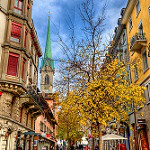

In [33]:
imagee=Image.open('./intel-image-classification/seg_pred/seg_pred/10004.jpg')
imagee

In [48]:
image_prediction('./intel-image-classification/seg_pred/seg_pred/10004.jpg')

'street'

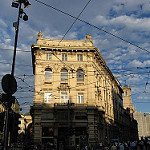

In [35]:
Image.open('./intel-image-classification/seg_pred/seg_pred/10048.jpg')

In [36]:
image_prediction('./intel-image-classification/seg_pred/seg_pred/10048.jpg')

'buildings'

# `3. Recurrent neural network`

In [37]:
import re
import random
import numpy as np
import pandas as pd

from tensorflow import keras

from nltk.corpus import stopwords
from nltk import download

from sklearn.feature_extraction.text import TfidfVectorizer

## Data import - Clickbait title

In [38]:
df = pd.read_csv("Clickbait_titles.csv", delimiter=';')
df.head()

,Text,Clickbait
0,Snoopy Got A Star On The Walk Of Fame And Seem...,1
1,15 Tweets That Are Too Real For Anyone Who Has...,1
2,"Try To Stay Calm '90s Kids, But The ""Full Hous...",1
3,P1 Pico Projector Stands Out From a Small Crowd,0
4,NBA: Gilbert Arenas and Javaris Crittenton sus...,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        32000 non-null  object
 1    Clickbait  32000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 500.1+ KB


In [40]:
def delete_stopwords(str_x):
    words = str_x.split(' ')
    neutral_words = ['one', 'say', 'page', 'know', 'go', 'back', 'take', 'see', 'look', 'article',
                     'edit', 'got', 'thing', 'want', 'make', 'people']
    new_words = list()
    for word in words:
        if word not in stopwords.words('english') or word not in neutral_words:
            new_words.append(word)
    return ' '.join(new_words)

## Preprocessing

In [41]:
download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [42]:
df["Text"] = df["Text"].map(lambda x: re.sub(r'[^\w]', ' ', x))
df["Text"] = df["Text"].map(lambda x: x.lower()) 
df["Text"] = df["Text"].map(delete_stopwords)

##Model initialising

In [43]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["Text"].values).toarray()
Y = df.iloc[:, 1].values

num_samples = 500 #X.shape[0]
train_samples = int(0.75*num_samples)

indexes = np.arange(num_samples)
random.shuffle(indexes)
X, Y = X[indexes], Y[indexes]
x_train, y_train = X[:train_samples, :], Y[:train_samples]
x_test, y_test = X[train_samples:, :], Y[train_samples:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(375, 22761) (375,)
(125, 22761) (125,)


## Model params

In [44]:
inputs = keras.Input(shape=(22761, 1))

x = keras.layers.LSTM(128)(inputs)

outputs = keras.layers.Dense(1, activation="softmax")(x)
rnn_model = keras.Model(inputs=inputs, outputs=outputs, name="rnn_model")
rnn_model.summary()

Model: "rnn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 22761, 1)]        0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [45]:
rnn_model.compile(
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

## Training

In [46]:
rnn_model.fit(x_train, y_train, batch_size=4, epochs=1, validation_split=0.2)

75/75 [==============================] - 1361s 18s/step - loss: 0.0000e+00 - accuracy: 0.4333 - val_loss: 0.0000e+00 - val_accuracy: 0.5733


## Eval

In [47]:
test_scores = rnn_model.evaluate(x_test, y_test, verbose=2)

print(f"Test loss: {test_scores[0]}  |  Test accuracy:", test_scores[1])

4/4 - 24s - loss: 0.0000e+00 - accuracy: 0.4480
Test loss: 0.0  |  Test accuracy: 0.4480000138282776
